# 教師なし学習
答えの与えられていないデータセットに対して、AIが自ら判断して答えを決めるという教師なし学習

- クラスタリング
- 主成分分析

## クラスタリング
データをクラスターに分割する操作のこと</br>
クラスタリングには、クラスターの個数を自動で推測する方法と人間が決める方法がある</br>

クラスタリングの一例として「k-means法」を使ったデータ操作の様子</br>
黒い点がクラスタリングする前の状態</br>
紫の点はデータの“重心”と呼ぶパラメーターで、</br>
k-means法はこの重心の最適な位置をデータから学習し、その学習した重心を使ってデータをクラスタリング</br>
![](./images/clustering.gif)

### クラスターの数
教師なし学習の目的は、分析したいデータ自身から機械的に特徴を捉えて分析すること</br>
この理由から、人がクラスターの個数を決めない手法の方が良いという考え方もある</br>
「階層的」と呼ばれる手法は、このクラスターの個数を自動で推定する手法</br>
しかし、階層的な手法は比較的多くの計算量が必要</br>
データ数が多い場合は、階層的ではない手法が適している場合がある</br>


## 主成分分析
「主成分分析」とは、データを「次元削減」するためによく使う手法</br>
次元削減とはデータを表す次元を低くすること</br>
例えば、3次元のデータから座標軸を一つ減らして、2次元のグラフを作成できる</br>

主成分分析を使えば、異なる種類のデータを組み合わせて、2次元もしくは3次元の一つのグラフを作成できる

![](./images/principal_analysis.png)

主成分分析を使うと生徒データを2次元のデータに変換できる</br>
具体的には、データの特徴を特に示す軸（主成分）を学習する</br>
学習した軸でグラフを作り直せば、できるだけ情報を保った一つのグラフで、全てのデータを見やすく示すことができる</br>
この軸を決める手法が主成分分析


## ユークリッド距離
n次元空間における二点間に拡張したものが、ユークリッド距離</br>
ユークリッド距離のことを ノルム と呼ぶこともある</br>

![](./images/euclid.png)

In [2]:
# numpyを用いてもユークリッド距離を求める
import numpy as np
vec_a = np.array([1, 3, 5])
vec_b = np.array([2, 4, 6])
print(np.linalg.norm(vec_a - vec_b))


1.7320508075688772


## コサイン類似度

ベクトルを表す性質　として挙げられるのは　「長さ」と「方向」　</br>
2つのベクトルが向いている 「方向」の類似度 とは、単純にそれら 2つのベクトルの成す角度 と対応していると考える</br>
2つのベクトルの成す角度をθとすると、θが小さいほど2つのデータは似ていることになる
![](./images/cosin.png)

以上から、cosθは2つのデータの類似度を表していることがわかる</br>
このように2つのベクトルの成す角度のcosをデータの類似度の指標としたものを、「コサイン類似度」と言う</br>
![](./images/cosin_v2.png)

In [4]:
import numpy as np
# vec_a = np.array([1, 2, 3])
# vec_b = np.array([2, 3, 4])
vec_a = np.array([0, 1])
vec_b = np.array([3, 4])
print(np.dot(vec_a, vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b)))

0.8


# クラスタリングの技法
## 階層的クラスタリング
階層的クラスタリングとはデータの中から最も似ている組み合わせを探し出し、順番にクラスターにしていく方法</br>
途中過程で階層構造になることが特徴</br>

5つのデータ点A,B,C,D,Eがある</br>
この5つのデータの内最も近いもの同士をまとめて、1つのクラスターを作る</br>
　　　A,B,C,D,E</br>
　　　→ (A,B), C,D,E</br>
この場合、この中の組み合わせではA,Bという2つが最も近い点であると計算により判断されたので、</br>
(A,B)という1つのクラスターを作る</br>
次に新しく出来たクラスターも1つのデータ点とみなす、これを繰り返す</br>
　　　→ (A,B), (C,D), E</br>
　　　→ (A,B,C,D), E</br>
　　　→ (A,B,C,D,E)</br>
最後に全データをまとめるクラスターまで行き着けば終了</br>
データ点がどのクラスターにまとめられていったのかを表現したのが、下の右図のような樹形図(デンドログラム)</br>
![](./images/tree_diagram.png)

## 非階層的クラスタリング
非階層的クラスタリングは、階層的クラスタリングと同じようにデータから似た性質のものを探し出し、クラスターを作りますが、階層構造を持たない</br>

データが与えられた際、開発者があらかじめクラスターをいくつ分けるかを決定し、その数の分だけデータからクラスターを作る</br>
ただし、データごとに 最適なクラスター数は決まっていない</br>
階層構造を持たないため、階層的クラスタリングと比べると計算量が少なく、データ量が多い場合に有効な手法</br>
非階層的クラスタリングの代表的な手法: k-means法

# k-means法
## データの集まり
あらかじめデータ構造を保有している練習用のデータを用意
クラスター数を指定した分だけデータ内でクラスターが生成される sklearn.datasets 内の make_blobs 関数

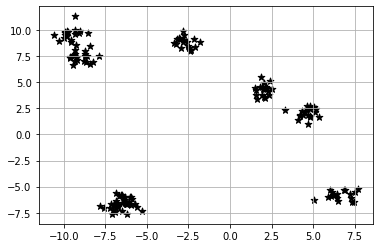

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Xには1つのプロットの(x,y)が、Yにはそのプロットの所属するクラスター番号が入る
X, Y = make_blobs(n_samples=150,       # サンプル点の総数
                  n_features=2,        # 特徴量（次元数）の指定  default:2
                  centers=8,           # クラスタの個数
                  cluster_std=0.5,     # クラスタ内の標準偏差
                  shuffle=True,        # サンプルをシャッフル
                  random_state=42)      # 乱数生成器の状態を指定

plt.scatter(X[:, 0], X[:, 1], c="black", marker="*", s=50)
plt.grid()
plt.show()

## k-means法について
k-means法は、データを分散の等しいn個のクラスターに分けることができる手法</br>
各クラスターごとにデータの重心にあたる平均値μ_iが割り当てられる、この重心のことを「セントロイド」</br>

分散の等しいクラスターに分けるには、「SSE」と呼ばれる指標を用いる</br>
SSEとは、各クラスターに含まれるデータ点とセントロイドとの差の2乗和を求めたもの(分散)</br>
k-means法はこのSSEを全クラスターで等しくかつ最小化するようにセントロイドを選ぶ

### k-means法のアルゴリズム
1. データ群の中からk個個(任意の数)のデータ点を抽出(k個の点を初期のセントロイドとする)し、セントロイドの初期化の後、2つのステップを反復
2. 全てのデータ点を、最も近いセントロイドにそれぞれ割り振る
3. 次に、各k個のセントロイドに割り振られたデータ群の重心を計算し、その重心を新たなセントロイドとして更新

ステップ3が終了する度に、前のセントロイドと新しくできたセントロイドの距離を計算する</br>
その距離がある程度小さくなったら、上記の反復処理を終了する

[1 3 1 3 3 5 2 5 5 0 0 1 0 0 0 3 0 0 0 4 4 2 3 1 5 3 3 0 4 5 3 3 2 2 5 2 2
 1 4 1 2 2 1 5 1 0 5 0 3 0 5 3 4 2 0 1 2 0 1 0 1 3 2 3 4 3 4 2 5 5 2 3 1 3
 3 4 4 2 3 5 5 2 0 5 3 1 5 4 0 3 0 5 3 4 5 1 5 5 1 1 0 2 4 1 0 0 4 4 2 1 0
 2 2 4 0 4 5 4 5 0 5 4 4 4 2 4 3 4 2 3 1 0 5 5 2 2 1 4 1 1 1 1 2 4 3 1 5 3
 4 2]


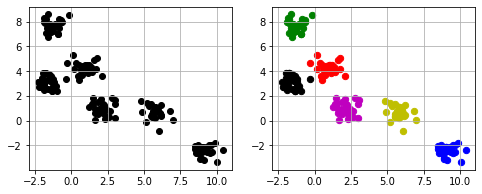

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# データセットの作成
X, Y = make_blobs(n_samples=150, n_features=2, centers=6,
                  cluster_std=0.5, shuffle=True, random_state=0)
# print(X)
# print("#"*10)
# print(Y)
# print("#"*10)
# k-means法
km = KMeans(n_clusters=6, random_state=0)
Y_km = km.fit_predict(X)  # Y_kmに各データ点が属するクラスタのラベルが入る
# print(Y_km)
# グラフの描画
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
# 元データをプロット
ax1.scatter(X[:, 0], X[:, 1], c="black")
ax1.grid()
# クラスタリング結果をプロット
ax2.scatter(X[Y_km == 0, 0], X[Y_km == 0, 1], c="r", s=40, label="cluster 1")
ax2.scatter(X[Y_km == 1, 0], X[Y_km == 1, 1], c="b", s=40, label="cluster 2")
ax2.scatter(X[Y_km == 2, 0], X[Y_km == 2, 1], c="g", s=40, label="cluster 3")
ax2.scatter(X[Y_km == 3, 0], X[Y_km == 3, 1], c="y", s=40, label="cluster 4")
ax2.scatter(X[Y_km == 4, 0], X[Y_km == 4, 1], c="k", s=40, label="cluster 5")
ax2.scatter(X[Y_km == 5, 0], X[Y_km == 5, 1], c="m", s=40, label="cluster 6")
ax2.grid()
plt.show()

## sklearnのKMeansライブラリ
データからクラスターを指定した分探し出し、Y_kmの各サンプルに、自動的にクラスタ番号を格納</br>
KMeans クラスには他にも様々な関数がある


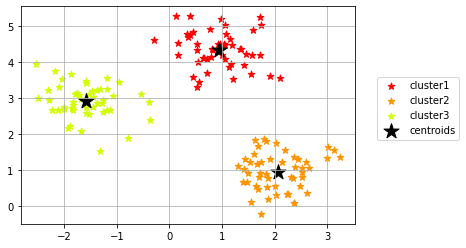

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# サンプルデータの生成
X, Y = make_blobs(n_samples=150, n_features=2, centers=3,
                  cluster_std=0.5, shuffle=True, random_state=0)
# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)
# クラスター番号(Y_km)に応じてデータをプロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km == n, 0], X[Y_km == n, 1], s=50, c=cm.hsv(
        float(n) / 10), marker="*", label="cluster"+str(n+1))
# セントロイドをプロット、km.cluster_centers_には各クラスターのセントロイドの座標が入っています
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[
            :, 1], s=250, marker="*", c="black", label="centroids")

plt.legend(bbox_to_anchor=(1.05, 0.7), loc="upper left")
plt.grid()
plt.show()

## SSE: クラスタリングの性能評価
クラスタリングの性能評価関数の一つにSSE(クラスタ内誤差平方和)がある</br>
SSEを用いることにより様々なk-meansクラスタリングの性能を評価することができる</br>
sklearnでは KMeans クラスのinertia_ 属性を通じてSSEの値を取得可能</br>
各データが自身の属するクラスター重心からどれほどずれているか(分散)の総和がSSEであるため、</br>
<b>SSEの値が小さいほどクラスタリングがうまくいっているモデル</b>


Distortion: 72.48


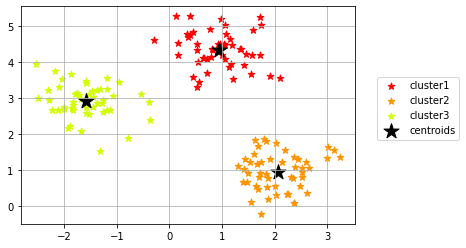

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# サンプルデータの生成
X, Y = make_blobs(n_samples=150, n_features=2, centers=3,
                  cluster_std=0.5, shuffle=True, random_state=0)
# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=1,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)
# SSE値を出力
print("Distortion: %.2f" % km.inertia_)
# プロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km == n, 0], X[Y_km == n, 1], s=50, c=cm.hsv(
        float(n) / 10), marker="*", label="cluster"+str(n+1))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[
            :, 1], s=250, marker="*", c="black", label="centroids")
plt.legend(bbox_to_anchor=(1.05, 0.7), loc="upper left")
plt.grid()
plt.show()

## エルボー法: クラスター数決定手法
k-meansクラスタリングで指定するクラスター数はどう決めれば良いかといった問題</br>
<b>エルボー法と呼ばれ、クラスタ数を大きくしていった時にSSEがどのように変化するかプロットし、その結果からk-meansのクラスタ数を決定する手法</b><br>
出力されるグラフの傾きがガクンと曲がる箇所があり、この時のクラスター数を最適とみなす</br>
プロットの形状が肘が曲がっているように見えることから、エルボー法と呼ばれている

現実的には演習問題の結果で得られる図のように、綺麗に、ある点でグラフが落ち込むようなエルボー図が得られることはあまりない

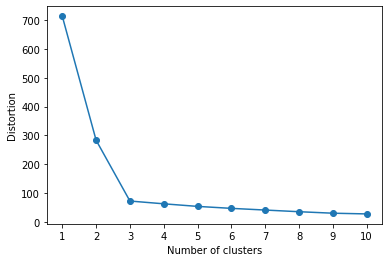

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X, Y = make_blobs(n_samples=150, n_features=2, centers=3,
                  cluster_std=0.5, shuffle=True, random_state=0)

distortions = []
for i in range(1, 11):                # クラスター数1~10を一気に計算
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングを実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

# グラフのプロット
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

# DBSCANのアルゴリズム
k-means法は、出来るだけクラスターの中心にデータが集まるようにクラスタリング</br>
そのため、必然的にクラスターは円形(球状)に近い形を取る</br>
クラスターの大きさ・形に偏りがないデータの場合は効果を発揮するが、クラスターの大きさ・形に偏りがあるデータの場合は良いクラスタリングができない傾向にある</br>

k-means法に対して、別の非階層クラスタリングのアルゴリズムに「DBSCAN」がある</br>
「DBSCAN」のアルゴリズムは、クラスターの高密度(データが凝集している)の場所を低密度の場所から分離して捉える</br>
クラスターの大きさ・形に偏りがあるデータの場合に有効</br>

「DBSCAN」は、min_samplesとepsの2つの指標を用いて、次の3種類にデータ点を分類する</br>
1. あるデータの半径 eps 内に min_sample 数だけのデータがある場合、そのデータ点は コア点 とみなす
2. コア点ではないが、コア点から半径 eps 内に入っているデータは、ボーダー点とみなる
3. どちらにも満たさないデータ点は、ノイズ点とみなす
4. コア点の集まりからクラスターを形成

ボーダー点は、最も近いコア点の属するクラスターに割り振る</br>
このように「DBSCAN」のアルゴリズムは、全データを3つのデータに分類することにより、</br>
偏ったデータや、平均的ではないクラスターも分類できるようになり、ノイズを正しく除去することもできる</br>

「DBSCAN」の実装には、sklearn.clusterのDBSCANクラスを利用

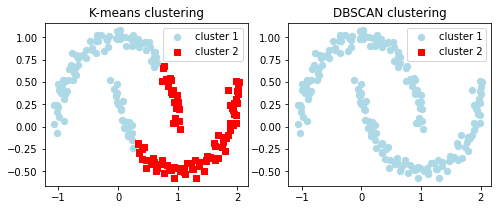

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# 月型のデータを生成
X, Y = make_moons(n_samples=200, noise=0.05, random_state=0)

# グラフと2つの軸を定義 左のax1はk-means法用、右のax2はDBSCAN用
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# k-means法
km = KMeans(n_clusters=2, random_state=0)
Y_km = km.fit_predict(X)

ax1.scatter(X[Y_km == 0, 0], X[Y_km == 0, 1], c="lightblue",
            marker="o", s=40, label="cluster 1")
ax1.scatter(X[Y_km == 1, 0], X[Y_km == 1, 1], c="red",
            marker="s", s=40, label="cluster 2")
ax1.set_title("K-means clustering")
ax1.legend()

# DBSCANでクラスタリング
db = DBSCAN()
Y_db = db.fit_predict(X)

ax2.scatter(X[Y_db == 0, 0], X[Y_db == 0, 1], c="lightblue",
            marker="o", s=40, label="cluster 1")
ax2.scatter(X[Y_db == 1, 0], X[Y_db == 1, 1], c="red",
            marker="s", s=40, label="cluster 2")
ax2.set_title("DBSCAN clustering")
ax2.legend()
plt.show()

# 主成分分析
主成分分析(Principal Component Analysis : PCA) は、データの要約 （少ないデータ数で元のデータを表現すること）の強力な手法

![](./images/principal_component_analysis.png)

例: 主成分分析を用いて10人の学生の数学と国語の得点データ（2次元）を圧縮し1次元に変換するイメージ</br>
主成分分析を用いると、全部のデータを最も効率よく説明できるような軸（第一主成分の軸）とそれだけでは説明しきれないデータを最も効率よく説明する軸（第二主成分の軸）が作られる</br>
第一主成分は元のデータをよく表現できるので、第二主成分の情報を捨てる（使わない）ことで効率よくデータの圧縮ができる</br>
主成分分析の実用例として、製品やサービスのスコアリングや比較（1次元に圧縮）、データの可視化（2,3次元に圧縮）、回帰分析の前処理、などがあげられる</br>
主成分分析は実用性が高く、機械学習の分野において重要なテーマの一つ


## 特徴変換までの流れ
主成分分析を使って、以下の手順で　データの圧縮（特徴変換）
1. データを標準化
2. 特徴同士の相関行列を計算
3. 相関行列の固有ベクトルと固有値を求める
4. 得られた固有値を大きい方からk個選び、対応する固有ベクトルを選択(kの値は、圧縮したい次元数を指定)
5. k個の固有ベクトルから特徴変換行列 {W} 作成
6. d次元のデータ {X} と行列 {W} で行列の積をとり、k次元に変換されたデータ {X'}を得る

以下の図は、このチャプターで扱うワインのデータセットを 特徴変換し、データを13次元から2次元に要約したイメージ</br>
![](./images/wine_principal.png)


## データの用意
主成分分析: UCI Machine Learning Repository</br>
178行分のワインサンプルに対して、ぶどうの種類データ（1〜3のラベル）とワインの化学的性質を表す特徴量データ（13種類）で構成されている

## 標準化
標準化とは、各特徴量について、平均が0、分散が1となるように、ワインのデータをあらかじめ変換すること

(177, 13)


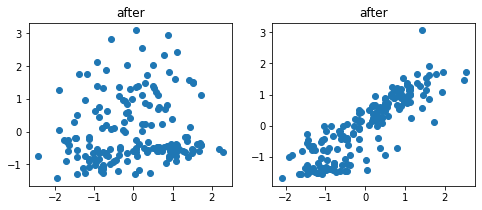

after
mean:  [-5.21867546e-16  2.81005602e-16 -3.81364745e-16 -2.40861944e-16
 -8.02873148e-17 -2.81005602e-16  1.60574630e-16 -6.02154861e-16
 -4.01436574e-17  1.80646458e-16  6.02154861e-16  7.22585833e-16
  1.60574630e-16] 
std:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
import pandas as pd
# https://archive-beta.ics.uci.edu/ml/datasets/wine
df_wine = pd.read_csv("./csv/wine.data")
# 特徴量データをXに、ラベルデータをyに格納
# df_wineの1列目はラベルデータ、2列目以降は特徴量データ
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
print(X.shape)

# 標準化
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 標準化後のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.set_title('after')
ax2.set_title('after')
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()

print("after")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

## 相関行列の計算
相関係数は、2つのデータ間の直線的な関係性の強さを表す指標で -1〜1の値をとる</br>
特徴量ごとの類似度を調べるため、データの 相関行列を計算する</br>

相関係数が1に近い（正の相関が強い）ときは、左の図のように二つのデータは片方が増加するともう片方も増加するような一次関数的な分布をとる</br>
負の相関が強いときは片方が増加するともう片方は減少するような一次関数的な分布をとる</br>

ワインの13種類の特徴データについて、それぞれの相関係数を保持する13x13の相関行列を求める</br>
求める 相関行列 は以下の通り</br>
![](./images/correlation_matrix.png)

このままではデータ同士の相関行列が求まってしまう</br>
データ同士ではなく特徴同士の相関行列を求めるため、correcoef(X.T)で{X}を転置する</br>
発展的な話になりますが、相関行列自体は標準化前の {X} を用いても同様に計算可能</br>
ここでは、この後のために、あらかじめ標準化している</br>
また、相関行列ではなく共分散行列を使った主成分分析もある</br>


In [34]:
import pandas as pd
import numpy as np

# https://archive-beta.ics.uci.edu/ml/datasets/wine
df_wine = pd.read_csv("./csv/wine.data")
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 相関行列（13x13）を作成
# データ同士ではなく特徴同士の相関行列を求めるため、correcoef(X.T)で{X}を転置する
R = np.corrcoef(X.T)
# 対角成分を0に転換
_R = R - np.identity(13)
# 最大相関係数をとるインデックスを取得
index = np.where(_R == _R.max())

print(_R[index[0][0], index[0][1]])
print(index)

0.8640455398784799
(array([5, 6]), array([6, 5]))


## 固有値と固有ベクトルに分解
相関行列を固有値と固有ベクトルに分解を行うと、もとの13x13次元の行列 {R} は、</br>
13個の特別な13次元ベクトル （固有ベクトル） v_1 〜 v_13と13個の特別な数 （固有値）lambda_1 〜 lambda_13 に分解される</br>
直感的には、元の行列は 固有ベクトルの方向に情報が集中しており、対応する固有値は情報の集中の度合いを示している</br>

numpyを使って以下のように固有値分解を計算可能</br>
{R}の固有値13個と固有ベクトル13個がそれぞれ、 eigvals と eigvecs に格納される</br>

```python
import numpy as np
# 相関行列から固有対を取得。
# numpy.linalg.eighはそれらを固有値の昇順で返す
eigvals, eigvecs = np.linalg.eigh(R)
```

![](./images/fixed_vector.png)


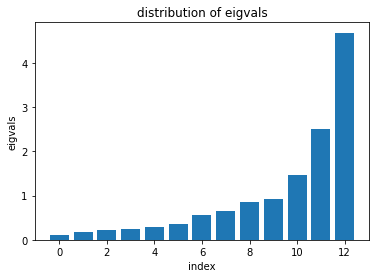

[0.10394972 0.16837682 0.22544019 0.24680867 0.28918002 0.35073883
 0.55198181 0.64484771 0.86173674 0.92444413 1.45332981 2.50136634
 4.6777992 ]


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://archive-beta.ics.uci.edu/ml/datasets/wine
df_wine = pd.read_csv("./csv/wine.data")
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 相関行列（13x13）を作成
R = np.corrcoef(X.T)

# 固有値分解
eigvals, eigvecs = np.linalg.eigh(R)

# 可視化
plt.bar(range(13), eigvals)
plt.title("distribution of eigvals")
plt.xlabel("index")
plt.ylabel("eigvals")
plt.show()

# 消さないでください。実行結果の確認に使います。
print(eigvals)

## 特徴変換
ここまで、相関行列を固有値と固有ベクトルに分解した</br>
次に、その中から最大の固有値と2番目に大きい固有値に対応する2つの固有ベクトルを用いて、</br>
13次元の特徴量を2次元に変換する13x2の行列 {W} を作り、</br>
13次元特徴量を持つWineデータ {X} を、第一主成分と第二主成分の2次元の特徴量のみを持つ新たなWineデータ {X'}に変換(=特徴変換)</br>


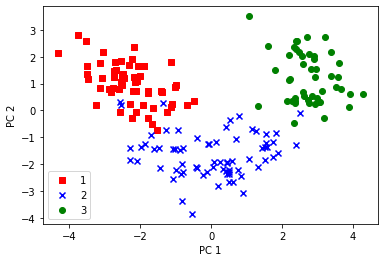

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://archive-beta.ics.uci.edu/ml/datasets/wine
df_wine = pd.read_csv("./csv/wine.data")
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 標準化
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 相関行列の取得
R = np.corrcoef(X.T)

# 固有値分解
eigvals, eigvecs = np.linalg.eigh(R)

# 変換行列の取得
# 13次元の特徴量を2次元に変換する13x2の行列 {W}
W = np.c_[eigvecs[:, -1], eigvecs[:, -2]]

# 特徴変換
# 13次元特徴量を持つWineデータ {X} を、第一主成分と第二主成分の2次元の特徴量のみを持つ新たなWineデータ {X'}に変換
X_pca = X.dot(W)

# 可視化
color = ["r", "b", "g"]
marker = ["s", "x", "o"]
for label, color, marker in zip(np.unique(y), color, marker):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                c=color, marker=marker, label=label)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.show()


## scikit-learnを使った主成分分析
ここまで、一つずつステップを踏んで主成分分析を用いた特徴変換を実装したが</br>
実は同様のことを、 sklearn.decomposition の PCA クラスを用いて簡単にできる</br>

fit_transform() メソッドでは、内部で自動的に変換行列を生成している

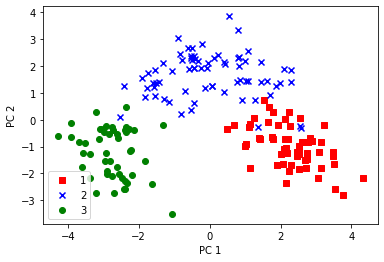

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

df_wine = pd.read_csv("./csv/wine.data")
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 主成分分析のインスタンスを生成。主成分数は2
pca = PCA(n_components=2)

# データから変換モデルを学習し、変換
X_pca = pca.fit_transform(X)

# 可視化
color = ["r", "b", "g"]
marker = ["s", "x", "o"]
for label, color, marker in zip(np.unique(y), color, marker):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                c=color, marker=marker, label=label)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.show()

## 前処理としての主成分分析
ここまで学んだことを応用して、回帰分析の前処理に主成分分析を適用する</br>
あらかじめデータを圧縮することで、外れ値などの外乱に強く、より汎用性の高い回帰分析モデルを生成できる</br>

特徴変換を行う際、トレーニングデータとテストデータで違う変換行列を求めて特徴変換を行ってしまうと、</br>
変換行列が異なってしまうために特徴変換後のデータを比較することができない</br>
※標準化についても同様</br>
これでは不便なことがあるので、<b>標準化と主成分分析を行う際はトレーニングデータとテストデータで共通の基準を使う</b>
標準化する際は、以下のように StandardScalar クラスを用いると便利
```python
from sklearn.preprocessing import StandardScaler
# 標準化のためのインスタンスを生成
sc = StandardScaler()
# トレーニングデータから変換モデルを学習し、テストデータに同じモデルを適用
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
```
主成分分析する際は、 PCA クラスを以下のように使う
```python
from sklearn.decomposition import PCA
# 主成分分析のインスタンスを生成
pca = PCA(n_components=2)
# トレーニングデータから変換モデルを学習し、テストデータに同じモデルを適用
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
```

回帰分析は以下のように行う
```python
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression()
# 分類モデルを学習
lr.fit(X, y)
# スコアの表示
print(lr.score(X, y))
```

### なぜ `test data` に対しては、transform() methodを使うのか？
We want scaling to be applied to our test data too</br>
and at the same time do not want to be biased with our model.</br>
We want our test data to be a completely new and a surprise set for our model.</br>
The transform method helps us in this case.</br>


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

df_wine = pd.read_csv("./csv/wine.data", header=None)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

# 標準化のためのインスタンスを生成
sc = StandardScaler()
# トレーニングデータから変換モデルを学習し、テストデータに適用
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 主成分分析のインスタンスを生成
pca = PCA(n_components=2)
# トレーニングデータから変換モデルを学習し、テストデータに適用
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression()
# 次元削減後のトレーニングデータで分類モデルを学習
lr.fit(X_train_pca, y_train)

# スコアの表示
print(lr.score(X_train_pca, y_train))
print(lr.score(X_test_pca, y_test))

0.9811320754716981
0.9583333333333334


# カーネル主成分分析
回帰分析など、機械学習の多くのアルゴリズムは線形分離できるデータが与えられることを前提として、</br>
現実問題として線形分離することが困難なデータ、つまり非線形分離する必要があるデータがほとんど</br>
非線形分離する必要があるデータに対処できるカーネル化されたPCA、 「カーネルPCA(kernel PCA)」 について取り上げる</br>

カーネルPCA では与えられたNxM（データ数✕特徴の種類）のデータ {X} を、</br>
全く新しいNxM´（データ数✕特徴の種類）のデータ{K} に作り変える （カーネルトリック）</br>
カーネルトリックを用いると一般的に特徴の種類は多くなり（特徴量が展開され）、線形分離させやすくなる</br>

非線形性の高いデータに対して主成分分析を用いてもうまく行かないことが知られているが、</br>
データをカーネル行列 {K} に展開することで主成分分析ができる</br>

下の図は、円形に分布する2次元のデータに、カーネルトリックで特徴量を増やした後、主成分分析により特徴量を2つに戻してプロットした図</br>
カーネルPCAを用いると、以下のような2次元空間で線形分離不可能なデータを線形分離可能なデータに変換することができる</br>
![](./images/kernel_principal.png)

## カーネルトリックⅠ
カーネル(類似度)行列 {K} を計算する</br>
以下のような行列をカーネル行列といい、全てのサンプルデータのペアごとに類似度を計算している</br>
NxM（データ数x特徴の種類）のデータ {X} のカーネル行列は、NxN （データ数xデータ数）になる</br>
カーネル行列 {K} をデータのように扱って、回帰や分類といった解析ができるようになる
![](./images/kernel_vectors.png)

![](./images/unsupervised_chap3_5.png)

γを大きくすると、 より近接するものだけに注目したような特徴量行列 {K} が作られる



## カーネルトリックⅡ
カーネルトリックに用いる以下の関数を実装</br>
以下のようにしてカーネル行列を計算できる</br>
![](./images/kernel_function.png)

```python
# データ同士の距離の2乗（平方ユークリッド距離）を計算
M = np.sum((X - X[:, np.newaxis])**2, axis=2)
# カーネル行列を計算
K = np.exp(-gamma * M)
```

ここではデータ間の距離の取得に、NumPy配列のブロードキャストという機能（自動的に行列を展開して行列の形を揃え、演算を実行する）を使っている

### 平方ユークリッド距離の計算方法
```python
M = np.sum((X - X[:, np.newaxis])**2, axis=2)
```
上述したように、ここでは異なるNumPy配列のshapeを自動で揃えて演算を行う「ブロードキャスト」を使っている</br>
ブロードキャストは以下のステップで実行される</br>

1. 次元数が違う場合、少ない方のNumPy配列の先頭に要素数1の次元を追加する
2. 各次元のサイズ（要素数）が一致しているか、末尾の次元からチェックする
3. サイズが合わない場合、片方のサイズが1であれば要素をコピーしてもう一方の配列のサイズに合わせる(どちらのサイズも1でなければValueError)
4. 全次元のサイズが一致した時点でブロードキャスト終了

In [46]:
import numpy as np

np.random.seed(39)

X = np.random.rand(8, 3)

# ペアごとの平方ユークリッド距離を計算
M = np.sum((X - X[:, np.newaxis])**2, axis=2)

# カーネル行列を計算
gamma = 15
K = np.exp(-gamma * M)
print(X.shape)
print(K.shape)
# print(M)
# print(K)

(8, 3)
(8, 8)


## 特徴変換
標準的な主成分分析手法と同様に、カーネル行列 {K} に固有値分解、特徴変換などを行うと、線形分離可能なデータ{X'}に変換できる</br>
もともと {K} は {X} の特徴量を展開したものですから、 {K} を特徴変換して得られる行列は、 {X} の特徴量を変換した行列として扱うことができる</br>

![](./images/unsupervised_chap3_4.png)


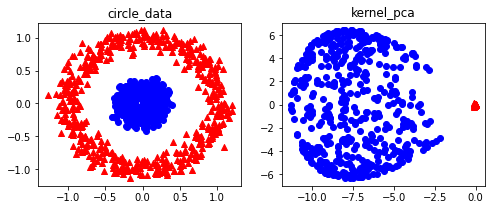

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# データが円状に分布するデータを取得
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

# ペアごとの平方ユークリッド距離を計算
M = np.sum((X-X[:, np.newaxis])**2, axis=2)

# 対称カーネル行列を計算。γの値は15
gamma = 15
K = np.exp(-gamma*M)

# カーネル行列から固有対を取得。 numpy.linalg.eighにより、それらを固有値の昇順で返す
eigvals, eigvecs = np.linalg.eigh(K)
# 固有値の値が大きい順に2つ、対応する固有ベクトルを抽出
W = np.c_[eigvecs[:, -1], eigvecs[:, -2]]

# KとWの内積を求めて線形分離可能なデータを計算
X_kpca = np.dot(K, W)

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.scatter(X[y == 0, 0], X[y == 0, 1], color="r", marker="^")
ax1.scatter(X[y == 1, 0], X[y == 1, 1], color="b", marker="o")
ax2.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color="r", marker="^")
ax2.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color="b", marker="o")
ax1.set_title("circle_data")
ax2.set_title("kernel_pca")
plt.show()

## scikit-learnを使ったカーネル主成分分析
カーネル主成分分析は、標準のPCAと同じように sklearn.decomposition を使って簡単に実装できる</br>
また、引数で圧縮後の次元の数と、標準のPCAにはなかったカーネルの種類を指定することができる</br>


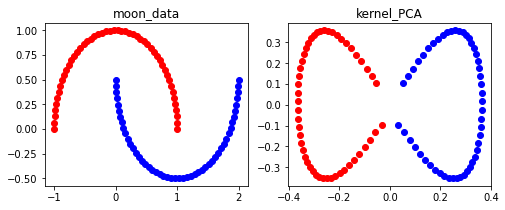

In [49]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
# 月形データを取得
X, y = make_moons(n_samples=100, random_state=123)

# KernelPCAクラスをインスタンス化
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
# データXをKernelPCAを用いて変換
X_kpca = kpca.fit_transform(X)

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.scatter(X[y == 0, 0], X[y == 0, 1], c="r")
ax1.scatter(X[y == 1, 0], X[y == 1, 1], c="b")
ax1.set_title("moon_data")
ax2.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], c="r")
ax2.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], c="b")
ax2.set_title("kernel_PCA")
plt.show()
